In [6]:
import time
import mlrose_hiive as mlrh
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [7, 7]

random_state = 923
np.random.seed(923)

def plot_fitness_iteration(curve, title, x="Iteration", y="Fitness"):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    length = len(curve)
    plt.plot(range(length), curve[:,0], label=y, lw=2)
    plt.legend(loc="upper left")
    plt.show()

In [9]:
# Problem definition
length = 150
t_pct = 0.9
global eval_count
eval_count = 0

base_fit_func = mlrh.FourPeaks(t_pct=t_pct).evaluate

def four_peaks_fit(state):
    global eval_count
    eval_count += 1
    return base_fit_func(state)

# Initialize custom fitness function object
fitness = mlrh.CustomFitness(four_peaks_fit)

problem = mlrh.DiscreteOpt(length=length,
                        fitness_fn=fitness,
                        maximize=True)

### MIMIC

MIMIC - Total Function Evaluations: 52043


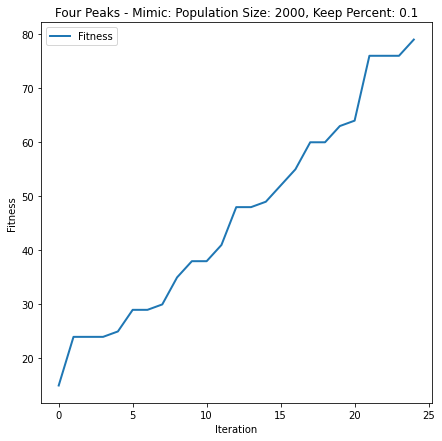

In [12]:
max_attempts = 10
max_iters = 25
keep_pct= 0.1
pop_size = 2000
global eval_count
eval_count = 0
best_state, best_fitness, mimic_curve = mlrh.mimic(problem = problem,
                                             max_attempts=max_attempts,
                                             max_iters=max_iters,
                                             random_state=random_state,
                                             pop_size=pop_size,
                                             keep_pct=keep_pct,
                                             curve=True)
print("MIMIC - Total Function Evaluations:", eval_count)
plot_fitness_iteration(mimic_curve,
                       "Four Peaks - Mimic: Population Size: {}, Keep Percent: {}".format(pop_size, keep_pct))

### GA

Genetic Alg - Total Function Evaluations: 52035


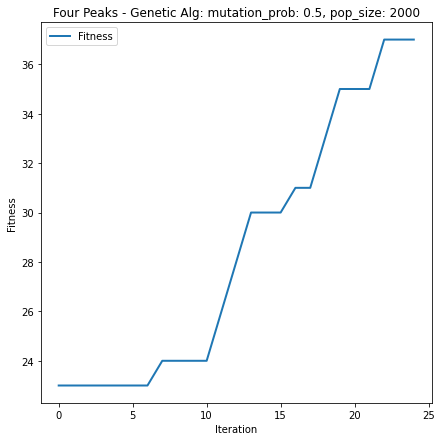

In [16]:
max_attempts = 20
max_iters = 25
mutation_prob = 0.5 
pop_size = 2000
global eval_count
eval_count = 0
best_state, best_fitness, gen_curve = mlrh.genetic_alg(problem = problem,
                                                   max_attempts=max_attempts,
                                                   max_iters=max_iters,
                                                   random_state=random_state,
                                                   pop_size=pop_size,
                                                   mutation_prob=mutation_prob,
                                                   curve=True)
print("Genetic Alg - Total Function Evaluations:", eval_count)
plot_fitness_iteration(gen_curve,
                       "Four Peaks - Genetic Alg: mutation_prob: {}, pop_size: {}".format(mutation_prob, pop_size))

### SA

Simulated Annealing - Total Function Evaluations: 1960


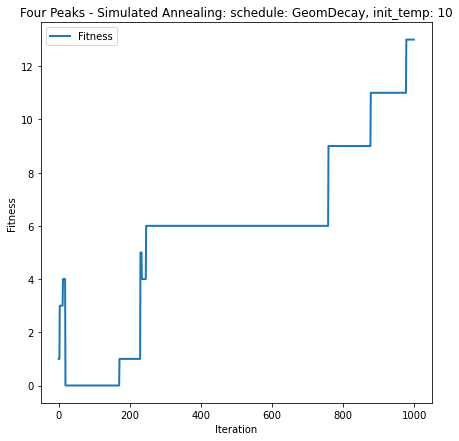

In [17]:
max_attempts = 200
max_iters = 1000
init_temp = 10
schedule = mlrh.GeomDecay(init_temp)
global eval_count
eval_count = 0
best_state, best_fitness, sa_curve = mlrh.simulated_annealing(problem = problem,
                                                             max_attempts=max_attempts,
                                                             max_iters=max_iters,
                                                             random_state=random_state,
                                                             schedule=schedule,
                                                             curve=True)
print("Simulated Annealing - Total Function Evaluations:", eval_count)
plot_fitness_iteration(sa_curve,
                       "Four Peaks - Simulated Annealing: schedule: {}, init_temp: {}".format(schedule.__class__.__name__, init_temp))

### RHC

Randomized Hill Climbing - Total Function Evaluations: 1788


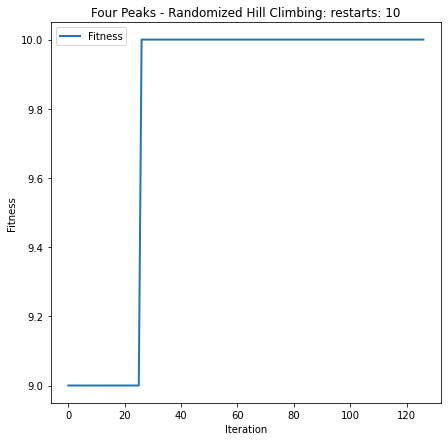

In [18]:
max_attempts = 100
max_iters = 1000
restarts = 10
global eval_count
eval_count = 0
best_state, best_fitness, rhc_curve = mlrh.random_hill_climb(problem = problem,
                                                         max_attempts=max_attempts,
                                                         max_iters=max_iters,
                                                         random_state=random_state,
                                                         restarts=restarts,
                                                         curve=True)
print("Randomized Hill Climbing - Total Function Evaluations:", eval_count)
plot_fitness_iteration(rhc_curve,
                       "Four Peaks - Randomized Hill Climbing: restarts: {}".format(restarts))

## Fitness and Iteration

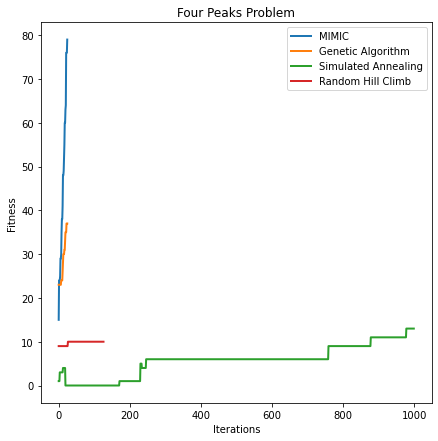

In [19]:
all_curves = {"MIMIC": mimic_curve, "Genetic Algorithm": gen_curve, "Simulated Annealing": sa_curve, "Random Hill Climb": rhc_curve}

plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.title("Four Peaks Problem")

for name, curve in all_curves.items():
    plt.plot(range(len(curve)), curve[:,0], label=name, lw=2)
    plt.legend(loc="best")
plt.show()

## Function evaluation with different input size

In [20]:
def prob_gen(input=150):
    length = input
    t_pct = 0.9
    global eval_count
    eval_count = 0

    base_fit_func = mlrh.FourPeaks(t_pct=t_pct).evaluate

    def four_peaks_fit(state):
        global eval_count
        eval_count += 1

        return base_fit_func(state)


    # Initialize custom fitness function object
    fitness = mlrh.CustomFitness(four_peaks_fit)

    prob = mlrh.DiscreteOpt(length=length,
                        fitness_fn=fitness,
                        maximize=True)
    
    return prob

In [22]:
def eval_count_rhc(prob):
    s = time.time()
    max_attempts = 100
    max_iters = 1000
    restarts = 10
    global eval_count
    eval_count = 0
    best_state, best_fitness, rhc_curve = mlrh.random_hill_climb(prob,
                                                         max_attempts=max_attempts,
                                                         max_iters=max_iters,
                                                         random_state=random_state,
                                                         restarts=restarts,
                                                         curve=True)
    e = time.time()
    t_diff = e-s
    result = (eval_count, len(rhc_curve), t_diff)
    return result

def eval_count_sa(prob):
    s = time.time()
    max_attempts = 200
    max_iters = 1000
    init_temp = 10
    schedule = mlrh.ExpDecay(init_temp)
    global eval_count
    eval_count = 0
    best_state, best_fitness, sa_curve = mlrh.simulated_annealing(prob,
                                                             max_attempts=max_attempts,
                                                             max_iters=max_iters,
                                                             random_state=random_state,
                                                             schedule=schedule,
                                                             curve=True)
    e = time.time()
    t_diff = e-s
    result = (eval_count, len(rhc_curve), t_diff)
    return result

def eval_count_gen(prob):
    s = time.time()
    max_attempts = 20
    max_iters = 25
    mutation_prob=0.5
    pop_size = 2000
    global eval_count
    eval_count = 0
    best_state, best_fitness, gen_curve = mlrh.genetic_alg(prob,
                                                   max_attempts=max_attempts,
                                                   max_iters=max_iters,
                                                   random_state=random_state,
                                                   pop_size=pop_size,
                                                   mutation_prob=mutation_prob,
                                                   curve=True)
    e = time.time()
    t_diff = e-s
    result = (eval_count, len(rhc_curve), t_diff)
    return result

def eval_count_mimic(prob):
    s = time.time()
    max_attempts = 10
    max_iters = 25
    keep_pct=0.1
    pop_size = 2000
    global eval_count
    eval_count = 0
    best_state, best_fitness, mimic_curve = mlrh.mimic(prob,
                                             max_attempts=max_attempts,
                                             max_iters=max_iters,
                                             random_state=random_state,
                                             pop_size=pop_size,
                                             keep_pct=keep_pct,
                                             curve=True)
    e = time.time()
    t_diff = e-s
    result = (eval_count, len(rhc_curve), t_diff)
    return result



In [23]:
np.random.seed(923)
inputs = [10, 20, 30, 40, 50, 60, 70, 80]

mimic_curve_eval = [eval_count_mimic(prob_gen(x)) for x in inputs]
gen_curve_eval = [eval_count_gen(prob_gen(x)) for x in inputs]
sa_curve_eval = [eval_count_sa(prob_gen(x)) for x in inputs]
rhc_curve_eval = [eval_count_rhc(prob_gen(x)) for x in inputs]

all_curves = {"MIMIC": mimic_curve_eval,
              "Genetic Algorithm": gen_curve_eval,
              "Simulated Annealing": sa_curve_eval,
              "Random Hill Climb": rhc_curve_eval}


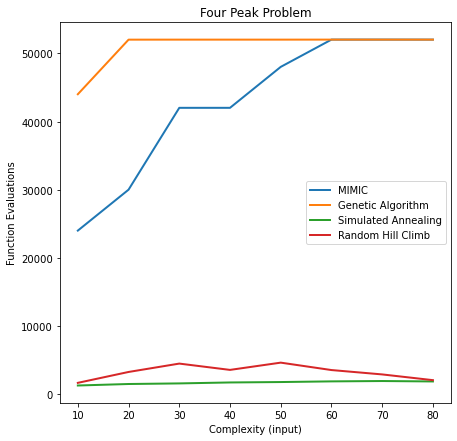

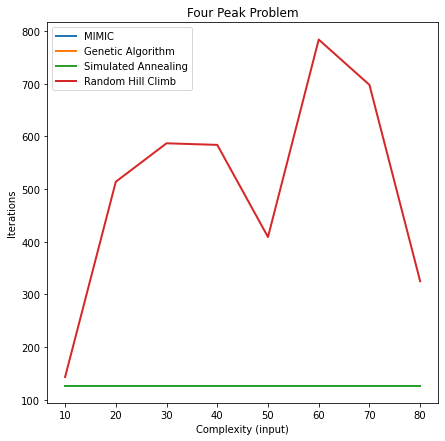

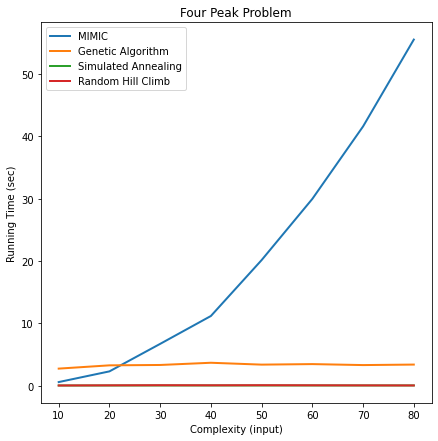

In [24]:
l = [("Complexity (input)", "Function Evaluations"),
     ("Complexity (input)", "Iterations"),
     ("Complexity (input)", "Running Time (sec)")]

for i in range(3):
    plt.xlabel(l[i][0])
    plt.ylabel(l[i][1])
    plt.title("Four Peak Problem")

    for name, curve in all_curves.items():
        plt.plot(inputs, [x[i] for x in curve], label=name, lw=2)
        plt.legend(loc="best")
    plt.show()

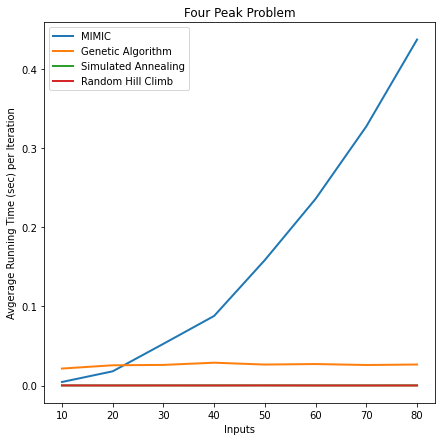

In [25]:
plt.xlabel("Inputs")
plt.ylabel("Avgerage Running Time (sec) per Iteration")
plt.title("Four Peak Problem")

for name, curve in all_curves.items():
    avg_time_div_iterations = np.array([x[2] for x in curve]) / np.array([x[1] for x in curve])
    plt.plot(inputs, avg_time_div_iterations, label=name, lw=2)

    plt.legend(loc="best")
plt.show()